#📌 Extracción

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np

In [44]:
datos = pd.read_json('/content/drive/MyDrive/Colab Notebooks/Challenge TelecomX 1/TelecomX_Data.json')

In [45]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [46]:
from pandas import json_normalize

## **Normalización de los datos**

In [47]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [48]:
datos.set_index('customerID', inplace=True)

In [49]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Churn     7267 non-null   object
 1   customer  7267 non-null   object
 2   phone     7267 non-null   object
 3   internet  7267 non-null   object
 4   account   7267 non-null   object
dtypes: object(5)
memory usage: 340.6+ KB


#### **DATOS DE customer**

In [50]:
datos['customer'][0]

/tmp/ipython-input-714502455.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  datos['customer'][0]


{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

## **SERIE ACCOUNT**

In [52]:
serie_account = datos['account'].apply(pd.Series)
serie_account

,Contract,PaperlessBilling,PaymentMethod,Charges
customerID,,,,
0002-ORFBO,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
0003-MKNFE,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
0004-TLHLJ,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
0011-IGKFF,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
0013-EXCHZ,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"
...,...,...,...,...
9987-LUTYD,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}"
9992-RRAMN,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}"
9992-UJOEL,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}"


In [53]:
serie_charges2 = serie_account['Charges'].apply(pd.Series)
serie_charges2

,Monthly,Total
customerID,,
0002-ORFBO,65.60,593.3
0003-MKNFE,59.90,542.4
0004-TLHLJ,73.90,280.85
0011-IGKFF,98.00,1237.85
0013-EXCHZ,83.90,267.4
...,...,...
9987-LUTYD,55.15,742.9
9992-RRAMN,85.10,1873.7
9992-UJOEL,50.30,92.75


#### **DATOS CUSTOMER**

In [54]:
datos['Gender'] = datos['customer'].apply(lambda x: x.get('gender') if isinstance(x, dict) else None)

In [55]:
datos['SeniorCitizen'] = datos['customer'].apply(lambda x: x.get('SeniorCitizen') if isinstance(x, dict) else None)

In [56]:
datos["partner"] = datos["customer"].apply(lambda x: x.get("Partner") if isinstance(x, dict) else None)

In [57]:
datos["tenure"] = datos["customer"].apply(lambda x: x.get("tenure") if isinstance(x, dict) else None)

In [58]:
datos['Dependents'] = datos['customer'].apply(lambda x: x.get('Dependents') if isinstance(x, dict) else None)

#### **DATOS ACCOUNT**

In [59]:
datos['account'][0]

/tmp/ipython-input-283052402.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  datos['account'][0]


{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [60]:
charges_dict = datos['account'].apply(pd.Series)

In [61]:
datos['Contract'] = datos['account'].apply(lambda x: x.get('Contract') if isinstance(x, dict) else None)

In [62]:
datos['PaperlessBilling'] = datos['account'].apply(lambda x: x.get('PaperlessBilling') if isinstance(x, dict) else None)

In [63]:
datos['PaymentMethod'] = datos['account'].apply(lambda x: x.get('PaymentMethod') if isinstance(x, dict) else None)

##### **APLICANDO SERIES A COLUMNAS "MONTHLY" Y "TOTAL"**

In [64]:
charges_dict = charges_dict['Charges'].apply(pd.Series)

In [65]:
charges_dict['Monthly'] = pd.to_numeric(charges_dict['Monthly'], errors='coerce')
charges_dict['Total']   = pd.to_numeric(charges_dict['Total'], errors='coerce')

In [66]:
datos = pd.concat([datos, charges_dict], axis=1)
datos

,Churn,customer,phone,internet,account,Gender,SeniorCitizen,partner,tenure,Dependents,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
customerID,,,,,,,,,,,,,,,
0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,9,Yes,One year,Yes,Mailed check,65.60,593.30
0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,9,No,Month-to-month,No,Mailed check,59.90,542.40
0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,4,No,Month-to-month,Yes,Electronic check,73.90,280.85
0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,13,No,Month-to-month,Yes,Electronic check,98.00,1237.85
0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,3,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,13,No,One year,No,Mailed check,55.15,742.90
9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,22,No,Month-to-month,Yes,Electronic check,85.10,1873.70
9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,2,No,Month-to-month,Yes,Mailed check,50.30,92.75


#### **DATOS INTERNET**

In [83]:
serie_internet = datos['internet'].apply(pd.Series)
serie_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
0002-ORFBO,DSL,No,Yes,No,Yes,Yes,No
0003-MKNFE,DSL,No,No,No,No,No,Yes
0004-TLHLJ,Fiber optic,No,No,Yes,No,No,No
0011-IGKFF,Fiber optic,No,Yes,Yes,No,Yes,Yes
0013-EXCHZ,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
9987-LUTYD,DSL,Yes,No,No,Yes,No,No
9992-RRAMN,Fiber optic,No,No,No,No,No,Yes
9992-UJOEL,DSL,No,Yes,No,No,No,No


In [84]:
datos['InternetService'] = datos['internet'].apply(lambda x: x.get('InternetService') if isinstance(x, dict) else None)

In [85]:
datos['OnlineSecurity'] = datos['internet'].apply(lambda x: x.get('OnlineSecurity') if isinstance(x, dict) else None)

In [86]:
datos['OnlineBackup'] = datos['internet'].apply(lambda x: x.get('OnlineBackup') if isinstance(x, dict) else None)

In [87]:
datos['DeviceProtection'] = datos['internet'].apply(lambda x: x.get('DeviceProtection') if isinstance(x, dict) else None)

In [88]:
datos['TechSupport'] = datos['internet'].apply(lambda x: x.get('TechSupport') if isinstance(x, dict) else None)

In [89]:
datos['StreamingTV'] = datos['internet'].apply(lambda x: x.get('StreamingTV') if isinstance(x, dict) else None)

In [90]:
datos['StreamingMovies'] = datos['internet'].apply(lambda x: x.get('StreamingMovies') if isinstance(x, dict) else None)

#🔧 Transformación

### **CONVERTIR TENURE A INT**

In [67]:
datos['tenure'] = datos['tenure'].astype(np.int64)

In [68]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   customer          7267 non-null   object 
 2   phone             7267 non-null   object 
 3   internet          7267 non-null   object 
 4   account           7267 non-null   object 
 5   Gender            7267 non-null   object 
 6   SeniorCitizen     7267 non-null   int64  
 7   partner           7267 non-null   object 
 8   tenure            7267 non-null   int64  
 9   Dependents        7267 non-null   object 
 10  Contract          7267 non-null   object 
 11  PaperlessBilling  7267 non-null   object 
 12  PaymentMethod     7267 non-null   object 
 13  Monthly           7267 non-null   float64
 14  Total             7256 non-null   float64
dtypes: float64(2), int64(2), object(11)
memory usage: 908.4+ KB


### **Creacion columna "Cuentas_Diarias"**

In [69]:
# Crear columna Cuentas_Diarias
datos['Cuentas_Diarias'] = datos['Monthly']/30

In [70]:
datos.head()

,Churn,customer,phone,internet,account,Gender,SeniorCitizen,partner,tenure,Dependents,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
customerID,,,,,,,,,,,,,,,,
0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,9,Yes,One year,Yes,Mailed check,65.6,593.30,2.186667
0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,9,No,Month-to-month,No,Mailed check,59.9,542.40,1.996667
0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,4,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,13,No,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,3,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [71]:
datos['Contract'] = datos['account'].apply(lambda x: x.get('Contract') if isinstance(x, dict) else None)

### **Opcional** (Convertir "Yes" y "No" a "1" y "0" para mejor análisis de datos)

In [72]:
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})

In [73]:
datos['partner'] = datos['partner'].map({'Yes': 1, 'No': 0})


In [74]:
datos['Dependents'] = datos['Dependents'].map({'Yes': 1, 'No': 0})

,Churn,customer,phone,internet,account,Gender,SeniorCitizen,partner,tenure,Dependents,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
customerID,,,,,,,,,,,,,,,,
0002-ORFBO,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,9,1,One year,Yes,Mailed check,65.60,593.30,2.186667
0003-MKNFE,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,9,0,Month-to-month,No,Mailed check,59.90,542.40,1.996667
0004-TLHLJ,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,4,0,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
0011-IGKFF,1.0,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,1,13,0,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
0013-EXCHZ,1.0,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,1,3,0,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,0,13,0,One year,No,Mailed check,55.15,742.90,1.838333
9992-RRAMN,1.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,1,22,0,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
9992-UJOEL,0.0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,2,0,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667


In [77]:
datos['PaperlessBilling'] = datos['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [93]:
datos['OnlineSecurity'] = datos['OnlineSecurity'].map({'Yes': 1, 'No': 0})

In [94]:
datos['OnlineBackup'] = datos['OnlineBackup'].map({'Yes': 1, 'No': 0})

In [95]:
datos['DeviceProtection'] = datos['DeviceProtection'].map({'Yes': 1, 'No': 0})

In [96]:
datos['TechSupport'] = datos['TechSupport'].map({'Yes': 1, 'No': 0})

In [97]:
datos['StreamingTV'] = datos['StreamingTV'].map({'Yes': 1, 'No': 0})

In [98]:
datos['StreamingMovies'] = datos['StreamingMovies'].map({'Yes': 1, 'No': 0})

#📊 Carga y análisis

In [100]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   customer          7267 non-null   object 
 2   phone             7267 non-null   object 
 3   internet          7267 non-null   object 
 4   account           7267 non-null   object 
 5   Gender            7267 non-null   object 
 6   SeniorCitizen     7267 non-null   int64  
 7   partner           7267 non-null   int64  
 8   tenure            7267 non-null   int64  
 9   Dependents        7267 non-null   int64  
 10  Contract          7267 non-null   object 
 11  PaperlessBilling  7267 non-null   int64  
 12  PaymentMethod     7267 non-null   object 
 13  Monthly           7267 non-null   float64
 14  Total             7256 non-null   float64
 15  Cuentas_Diarias   7267 non-null   float64
 16  InternetService   7267 non-null 

In [92]:
datos.describe()

,Churn,SeniorCitizen,partner,tenure,Dependents,PaperlessBilling,Monthly,Total,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,32.346498,0.300124,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,24.571773,0.458343,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [107]:
datos.head(1)

,Churn,customer,phone,internet,account,Gender,SeniorCitizen,partner,tenure,Dependents,...,Monthly,Total,Cuentas_Diarias,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0.0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,9,1,...,65.6,593.3,2.186667,DSL,0.0,1.0,0.0,1.0,1.0,0.0


In [113]:
datos_reducido = datos[['Churn', 'Monthly', 'Total', 'Cuentas_Diarias', 'Contract','PaymentMethod','Gender', 'SeniorCitizen', 'InternetService' ]]
datos_reducido

,Churn,Monthly,Total,Cuentas_Diarias,Contract,PaymentMethod,Gender,SeniorCitizen,InternetService
customerID,,,,,,,,,
0002-ORFBO,0.0,65.60,593.30,2.186667,One year,Mailed check,Female,0,DSL
0003-MKNFE,0.0,59.90,542.40,1.996667,Month-to-month,Mailed check,Male,0,DSL
0004-TLHLJ,1.0,73.90,280.85,2.463333,Month-to-month,Electronic check,Male,0,Fiber optic
0011-IGKFF,1.0,98.00,1237.85,3.266667,Month-to-month,Electronic check,Male,1,Fiber optic
0013-EXCHZ,1.0,83.90,267.40,2.796667,Month-to-month,Mailed check,Female,1,Fiber optic
...,...,...,...,...,...,...,...,...,...
9987-LUTYD,0.0,55.15,742.90,1.838333,One year,Mailed check,Female,0,DSL
9992-RRAMN,1.0,85.10,1873.70,2.836667,Month-to-month,Electronic check,Male,0,Fiber optic
9992-UJOEL,0.0,50.30,92.75,1.676667,Month-to-month,Mailed check,Male,0,DSL


#📄Informe final

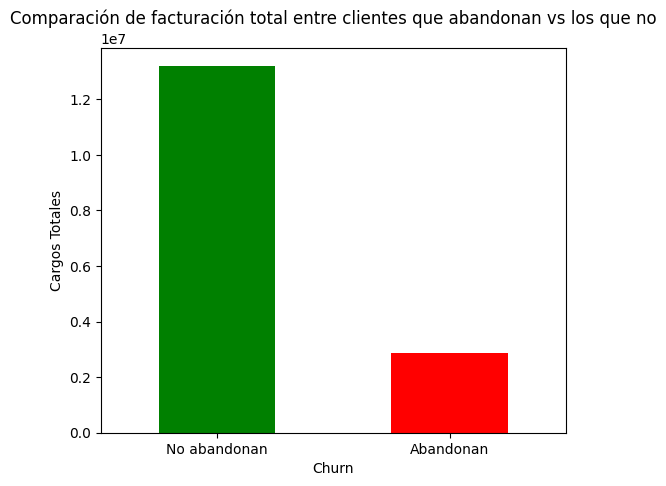

In [131]:
# Agrupar por Churn y sumar la facturación mensual
resumen = datos.groupby('Churn')['Total'].sum()

# Crear gráfico de barras
plt.figure(figsize=(6,5))
resumen.plot(kind='bar', color=['green', 'red'])
plt.xticks([0,1], ['No abandonan', 'Abandonan'], rotation=0)
plt.ylabel('Cargos Totales')
plt.title('Comparación de facturación total entre clientes que abandonan vs los que no')
plt.show()

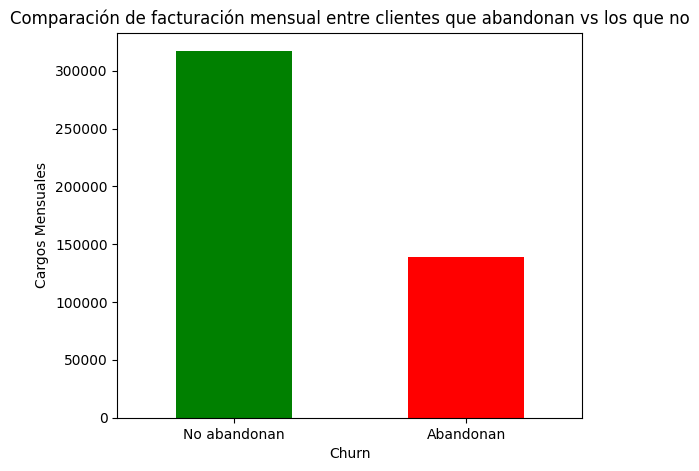

In [130]:
import matplotlib.pyplot as plt

# Agrupar por Churn y sumar la facturación mensual
resumen = datos.groupby('Churn')['Monthly'].sum()

# Crear gráfico de barras
plt.figure(figsize=(6,5))
resumen.plot(kind='bar', color=['green', 'red'])
plt.xticks([0,1], ['No abandonan', 'Abandonan'], rotation=0)
plt.ylabel('Cargos Mensuales')
plt.title('Comparación de facturación mensual entre clientes que abandonan vs los que no')
plt.show()


##LA MODA INDICA QUE HAY MENOS CLIENTES QUE ABANDONAN

In [143]:
datos_reducido['Churn'].mode()

,Churn
0,0.0


In [141]:
datos_reducido['Churn'].value_counts().unique()

array([5174, 1869])

### **EN PORCENTAJE EL 27% DE LOS CLIENTES ABANDONAN LA COMPAÑIA**

In [152]:
# Contar ocurrencias y convertir a porcentaje
porcentaje_churn = datos['Churn'].value_counts(normalize=True).round(2) * 100
porcentaje_churn.rename(index = {0: 'No Abandonan', 1: 'Abandonan'}, inplace= True )

print(porcentaje_churn)

Churn
No Abandonan    73.0
Abandonan       27.0
Name: proportion, dtype: float64


In [155]:
contract_dummies = pd.get_dummies(datos['Contract'], prefix='Contract')
datos_reducido = pd.concat([datos, contract_dummies], axis=1)

In [158]:
# Probabilidad de churn por tipo de contrato
prob_churn = datos.groupby('Contract')['Churn'].mean() * 100

print(prob_churn)

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


In [160]:
# Churn por género
prob_churn_gender = datos.groupby('Gender')['Churn'].mean() * 100

# Churn por tipo de contrato
prob_churn_contract = datos.groupby('Contract')['Churn'].mean() * 100

# Churn por método de pago
prob_churn_payment = datos.groupby('PaymentMethod')['Churn'].mean() * 100

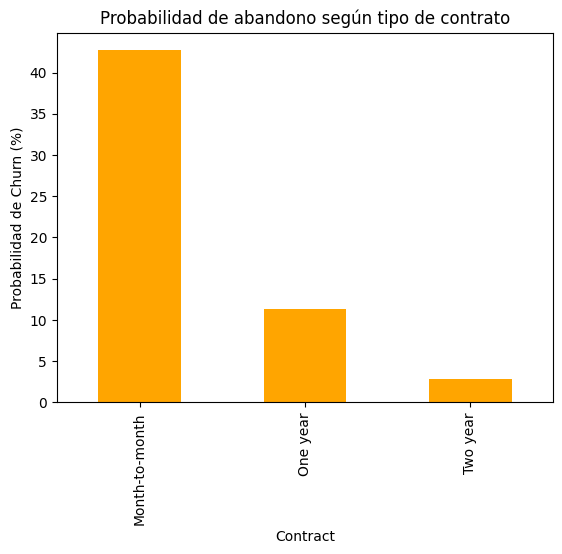

In [159]:
import matplotlib.pyplot as plt

prob_churn.plot(kind='bar', color='orange')
plt.ylabel('Probabilidad de Churn (%)')
plt.title('Probabilidad de abandono según tipo de contrato')
plt.show()

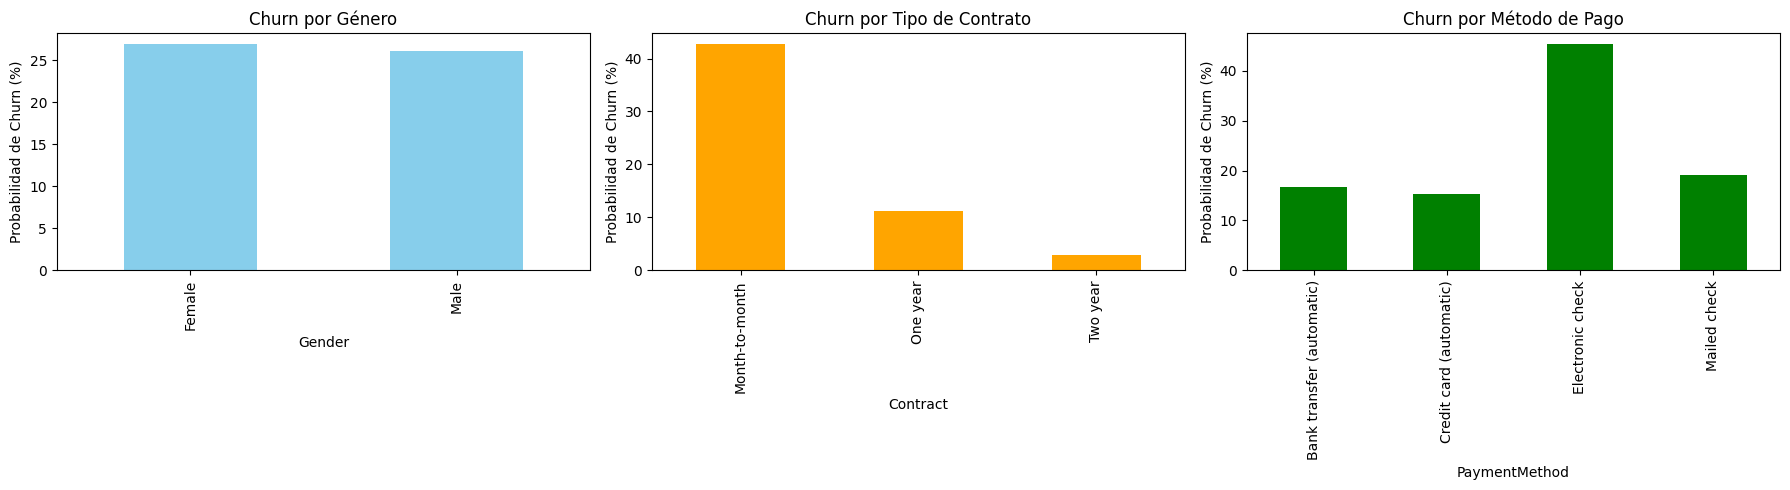

In [161]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Churn por género
prob_churn_gender.plot(kind='bar', ax=axs[0], color='skyblue', title='Churn por Género')
axs[0].set_ylabel('Probabilidad de Churn (%)')

# Churn por contrato
prob_churn_contract.plot(kind='bar', ax=axs[1], color='orange', title='Churn por Tipo de Contrato')
axs[1].set_ylabel('Probabilidad de Churn (%)')

# Churn por método de pago
prob_churn_payment.plot(kind='bar', ax=axs[2], color='green', title='Churn por Método de Pago')
axs[2].set_ylabel('Probabilidad de Churn (%)')

plt.tight_layout()
plt.show()
